In [9]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from collections import Counter, defaultdict

In [16]:
# read in data splits
splits = ['train', 'val', 'test']
dataset = {}
for split in splits:
    with open(f'../data/{split}.json') as f:
        print(f'{split} split:')
        
        data = json.load(f)
        df = pd.DataFrame(data['data'])
        
        # extract list of words from each utterance
        df['words'] = df.apply(lambda row: row['utterance'].split(' '), axis=1)
        df['length'] = df.apply(lambda row: len(row['words']), axis=1)
        
        total_n_words = sum(df['length'])
        print(f"n_examples: {len(df)} total_n_words: {total_n_words}, mean_length: {total_n_words / len(df) :.3f}, min_length: {min(df['length'])}, max_length: {max(df['length'])}")
        lengths = Counter(value for index, value in df['length'].iteritems())
        tot = 0
        for length_, cnt in sorted(list(lengths.items())):
            tot += cnt
            print(f"length={length_} count={cnt} {tot / len(df):.2%}")
        
        for n_gram in range(1, 5):
            print(f'{n_gram}-gram:')
            counter = Counter()
            for words in df['words']:
                counter.update(tuple(words[i:i+n_gram]) for i in range(len(words) - n_gram + 1))
            total_occurances = sum(counter.values())
            print(f'total: {len(counter)} total occurances: {total_occurances}')
            print(f'most common:')
            s = 0
            for gram, cnt in counter.most_common(50):
                s += cnt
                print(f"{' '.join(gram)}: {cnt} {s / total_occurances:.2%}")
            cnt_words = defaultdict(list)
            for word, cnt in counter.items():
                cnt_words[cnt].append(word)
            s = 0
            for cnt in range(1, 51):
                s += len(cnt_words[cnt])
                print(f'number of words occured {cnt} times: {len(cnt_words[cnt])} {s / len(counter):.2%}')
        
        dataset[split] = df

train split:
n_examples: 33155 total_n_words: 173143, mean_length: 5.222, min_length: 1, max_length: 256
length=1 count=7133 21.51%
length=2 count=3081 30.81%
length=3 count=3761 42.15%
length=4 count=3647 53.15%
length=5 count=3410 63.44%
length=6 count=2946 72.32%
length=7 count=2343 79.39%
length=8 count=1752 84.67%
length=9 count=1171 88.20%
length=10 count=945 91.05%
length=11 count=658 93.04%
length=12 count=522 94.61%
length=13 count=372 95.74%
length=14 count=295 96.62%
length=15 count=220 97.29%
length=16 count=163 97.78%
length=17 count=133 98.18%
length=18 count=100 98.48%
length=19 count=70 98.69%
length=20 count=61 98.88%
length=21 count=48 99.02%
length=22 count=31 99.12%
length=23 count=26 99.19%
length=24 count=21 99.26%
length=25 count=34 99.36%
length=26 count=17 99.41%
length=27 count=21 99.48%
length=28 count=16 99.52%
length=29 count=11 99.56%
length=30 count=9 99.58%
length=31 count=13 99.62%
length=32 count=10 99.65%
length=33 count=3 99.66%
length=34 count=6 99.

total: 66130 total occurances: 113966
most common:
you want to: 1170 1.03%
do you want: 655 1.60%
there we go: 323 1.88%
want me to: 195 2.06%
want to go: 191 2.22%
we have to: 176 2.38%
want to try: 163 2.52%
there is a: 159 2.66%
want to read: 157 2.80%
you want me: 155 2.93%
put it in: 143 3.06%
there you go: 142 3.18%
you have to: 135 3.30%
if you want: 125 3.41%
look at that: 122 3.52%
and there's a: 117 3.62%
want to get: 108 3.72%
want to put: 107 3.81%
a little bit: 101 3.90%
what do you: 99 3.99%
a lot of: 99 4.07%
have to put: 98 4.16%
you don't want: 98 4.25%
you can do: 98 4.33%
i'm going to: 97 4.42%
want to see: 96 4.50%
you want some: 95 4.58%
want to do: 94 4.67%
and there is: 93 4.75%
don't want to: 92 4.83%
look at the: 89 4.91%
you want the: 89 4.98%
you going to: 89 5.06%
you like the: 87 5.14%
you want a: 86 5.21%
here we go: 86 5.29%
can you put: 85 5.36%
are you going: 84 5.44%
i don't know: 80 5.51%
i have to: 79 5.58%
want to play: 79 5.65%
you see the: 78 5.72

total: 4440 total occurances: 7667
most common:
you want: 108 1.41%
want to: 92 2.61%
do you: 66 3.47%
you can: 41 4.00%
in the: 32 4.42%
have to: 32 4.84%
are you: 30 5.23%
going to: 30 5.62%
can you: 29 6.00%
on the: 29 6.38%
you are: 28 6.74%
and a: 25 7.07%
we go: 24 7.38%
we have: 24 7.70%
to go: 23 8.00%
to put: 23 8.30%
that's right: 22 8.58%
i know: 22 8.87%
you have: 22 9.16%
we can: 21 9.43%
that's a: 21 9.70%
i think: 21 9.98%
look at: 20 10.24%
is a: 19 10.49%
there's a: 18 10.72%
put it: 17 10.94%
with the: 16 11.15%
to try: 16 11.36%
there is: 16 11.57%
if you: 16 11.78%
this one: 16 11.99%
i don't: 15 12.18%
want me: 15 12.38%
me to: 15 12.57%
you like: 15 12.77%
there we: 14 12.95%
you go: 14 13.13%
all done: 14 13.32%
and you: 14 13.50%
it on: 14 13.68%
yeah you: 14 13.86%
play with: 14 14.05%
see the: 13 14.22%
at the: 13 14.39%
put on: 13 14.56%
on your: 13 14.73%
to get: 13 14.90%
put the: 13 15.06%
yeah i: 13 15.23%
that is: 12 15.39%
number of words occured 1 time

total: 4664 total occurances: 8217
most common:
you want: 124 1.51%
want to: 93 2.64%
do you: 70 3.49%
in the: 44 4.03%
have to: 41 4.53%
going to: 40 5.01%
can you: 38 5.48%
you can: 36 5.91%
you have: 33 6.32%
on the: 31 6.69%
to put: 30 7.06%
we go: 28 7.40%
are you: 28 7.74%
you are: 28 8.08%
i know: 27 8.41%
we can: 26 8.73%
that's right: 26 9.04%
the ball: 23 9.32%
look at: 23 9.60%
and a: 22 9.87%
i don't: 21 10.13%
there's a: 21 10.38%
there we: 21 10.64%
if you: 20 10.88%
i think: 20 11.12%
is a: 20 11.37%
this is: 20 11.61%
there is: 19 11.84%
to go: 19 12.07%
we have: 19 12.30%
you go: 18 12.52%
a little: 18 12.74%
it is: 17 12.95%
you like: 17 13.16%
there are: 17 13.36%
on your: 17 13.57%
put it: 16 13.76%
there you: 14 13.93%
to the: 14 14.10%
to get: 14 14.28%
at the: 13 14.43%
you wanna: 13 14.59%
have a: 13 14.75%
put this: 13 14.91%
of the: 13 15.07%
out of: 13 15.22%
little bit: 12 15.37%
yeah you: 12 15.52%
see the: 12 15.66%
put on: 12 15.81%
number of words occure

query: abooboobooboo
number of results for "abooboobooboo": 1


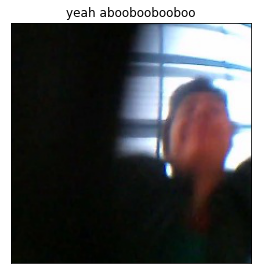

In [7]:
from textwrap import wrap

df = dataset['train']

# data dir
data_dir = '../data/train_5fps'

# search query
query = input("query: ")

# return results matching query
results = df[df.apply(lambda row: query in row['words'], axis=1)]
print(f'number of results for "{query}": {len(results)}')

# display first ten results
num_results = min(100, len(results))
top_results = results.sample(num_results)

n_column = 5
n_row = (num_results - 1) // n_column + 1

plt.figure(figsize=(25, 5 * n_row))
plt_count = 1
for idx, result in top_results.iterrows():
    # get utterance
    utterance = result['utterance']
    
    # get frame
    frame_filenames = result['frame_filenames']
    frame_filename = frame_filenames[len(frame_filenames) // 2]
    img = Image.open(os.path.join(data_dir, frame_filename))
    
    plt.subplot(n_row, n_column, plt_count)
    plt.imshow(img)
    plt.title("\n".join(wrap(utterance[:100], 40)))
    plt.xticks([])
    plt.yticks([])
    
    plt_count += 1